# Exercise: Using a trained model on a new dataset

Previously, we created a basic model that let us find the relationship between a person's shoe length and their height. We showed how this model could then be used to make a prediction about a new, previously unseen person.

We normally build models to make these kinds of predictions. Importantly, we can use these predictions to estimate how well a model might work in the real world.

In this exercise, we will split a dataset into training and test datasets. We will fit the model to the training dataset, and then run inference on the test dataset. We will use this to evaluate how well our model might work in the future on (even more) unseen data.

## Create first dataset

Let's begin by opening the dataset from file

In [22]:
import pandas

# Load a file containing people's shoe sizes
# and height, both in cm
data = pandas.read_csv('shoe-size-height.csv')

# Print the first few rows
data.head()


,shoe_length,height
0,29,177.6
1,32,183.8
2,15,159.0
3,32,192.8
4,24,172.6


We can also look at the number of rows and columns by looking at the data's `shape`. In this case, we have 50 rows and two columns:

In [23]:
data.shape

(50, 2)

## Split dataset into training and testing sets

Now, we split the dataset into a training and testing set. The training dataset will be used to fit the model. The testing dataset will be used to check how well it works on unseen data.

We will perform as 80/20 split, which means 80% of the data is randomly allocated to the training dataset, and the remaining 20% is allocated to the test dataset.

In [24]:
import matplotlib.pyplot as graph
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.model_selection import train_test_split
import numpy as np

# For simplicity, we will call shoe_length X and height y. 
# We will also convert them into numpy arrays, as these
# work nicely with our linear regression library 
X = np.array(data["shoe_length"])
y = np.array(data["height"])


# Now split these into two datasets, called train and test.
# test_size here states that we want 20% of the data to be
# in the 'test' dataset, and the remainder in the 'train' 
# dataset. We set random_state here so thatthe random allocation 
# is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Print out how this has been split
print(f"We started with {len(X)} rows. After splitting:")
print(f"X_train contains {len(X_train)} rows")
print(f"X_test contains {len(X_test)} rows")

We started with 50 rows. After splitting:
X_train contains 40 rows
X_test contains 10 rows


## Create and visualise the model

Let's create our model using the training data. We will fit a linear regession model, which tries to model the data using the equation `y = mx + c`, where the best m and c are calculated during fitting. 

The model is: y = 2.0819647232451173 * x + 122.54752045392675


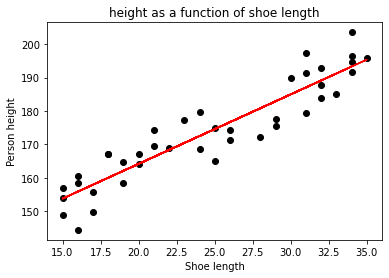

In [25]:
from sklearn.linear_model import LinearRegression
from numpy import reshape,array


# Note that the linear regression models from sklearn 
# require that the input data are 2D, even if we only
# have one column. So, to make this work, we need to 
# reshape our data slightly to look 2D
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Now create the linear regression model and fit it
# to our training dataset
model = LinearRegression()
model = model.fit(X_train,y_train)

# Print the model
intercept = model.intercept_.item()
slope = model.coef_.item()

print(f"The model is: y = {slope} * x + {intercept}")



# Show a graph of the result
# Don't worry about how this is done for now
%matplotlib inline
intercept = model.intercept_
slope = model.coef_
line = slope * X_train + intercept
graph.scatter(X_train, y_train,  color='black')
graph.plot(X_train, line, '-', c = 'red')
graph.ylabel('Person height')
graph.xlabel("Shoe length")
graph.title('height as a function of shoe length')
graph.show()



## Test Performance On Training Data

When we first fit our model, we usually want to check how well it has run on the training dataset. Specifically:

 1. Does it generate predictions at all? (this is basically checking with there are syntax errors in our code).
 2. Are the predictions **reasonably** close to the values we expect?

We can do this a number of ways, for example:

1. Print out some predictions alongside the real (expected) values
2. Calculate an error metric that summarises how well it fit the data 
3. Graph the model, if possible

The code below creates a function that uses the model to predict values, then runs all three of the above checks.

    Predicted  Expected
0  166.268780     169.4
1  193.334321     203.6
2  168.350744     168.8
3  187.088427     191.4
4  153.776991     149.0
5  174.596639     165.0
6  193.334321     196.6
7  189.170392     187.8
8  153.776991     154.0
9  187.088427     197.4

Error Metric (RMSE): 5.638976469468364

Visual Check:


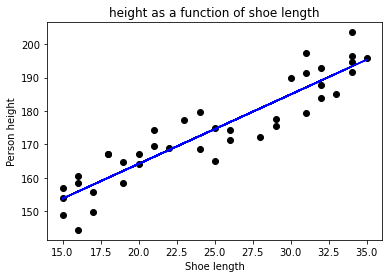

In [26]:
from sklearn.metrics import mean_squared_error


def assess_model(x, y):
    # Calculate the predicted values for the test data 
    y_pred = model.predict(x)

    # Make and print a table showing some expected (real)
    # values alongside predicted ones
    results_dataset = pandas.DataFrame({'Predicted': y_pred[:10,0], 'Expected': y[:10,0]})
    print(results_dataset)

    # Calculate the error between what's predicted and the actual values
    rms = mean_squared_error(y, y_pred, squared=False)
    print(f"\nError Metric (RMSE): {rms}")

    # Show a graph of the result
    # Don't worry about how this is done for now
    print("\nVisual Check:")
    %matplotlib inline
    intercept = model.intercept_
    slope = model.coef_
    line = slope * x + intercept
    graph.scatter(x, y,  color='black')
    graph.plot(x, line, '-', c = 'blue')
    graph.ylabel('Person height')
    graph.xlabel("Shoe length")
    graph.title('height as a function of shoe length')
    graph.show()

# Run and assess the model using the data it was trained on
assess_model(X_train, y_train)

## Test Performance on Test data

We expected the model to do a reasonable job on training data, but what we are more interested in is how well it does on data it has not seen before. This will be indicative of its real-world performance.

Let's now run and assess the model using the test data

    Predicted  Expected
0  155.858956     146.4
1  195.416286     195.0
2  168.350744     171.8
3  193.334321     196.6
4  153.776991     159.0
5  155.858956     157.4
6  162.104850     169.6
7  193.334321     196.6
8  180.842533     189.2
9  172.514674     172.6

Error Metric (RMSE): 5.277861996863306

Visual Check:


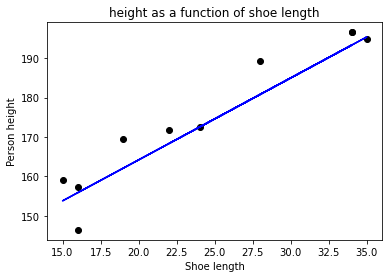

In [27]:
assess_model(X_test, y_test)

We can see that it did a reasonable job, but slightly worse RMSE than the training dataset. This is normal.

Later, if we make changes to the model, we could use the error metric to see if these changes improve its performance.

## Summary

In this exercise, we practiced splitting data into test and training datasets. We then trained our model on one dataset, then tested it on another. This is an execise you become used to with time, as it is the most common way to assess how well our models appear to be working.

-------------------------------------------------------------------------------------------------------------------------------

Now let's save the trained model so we can use it later

In [28]:
filename = './height_shoes_model.pkl'
joblib.dump(model, filename)

NameError: name 'joblib' is not defined

## Create second dataset

We would like to see how well our trained model performs on a brand new, unseen dataset

In [6]:
extra_data = {
    'shoe_length' : [21, 19, 21, 37, 11, 37, 22, 22, 20, 39,
                    11, 33, 26, 38, 12, 29, 21, 19, 15, 37,
                    25, 22, 13, 26, 23, 27, 23, 19, 20, 36,
                    ],
    'height': [164, 150, 175, 199, 150, 200, 177, 167, 160, 190,
               149, 188, 170, 198, 179, 179, 173, 149, 168, 207,
               173, 149, 148, 149, 173, 187, 188, 177, 187, 178]
}



## Testing second dataset

Let's start by loading in that model that we saved earlier

In [7]:
import joblib

model_loaded = joblib.load(filename)

We are testing the entire dataset this time, so we don't need to split it into test and train sets

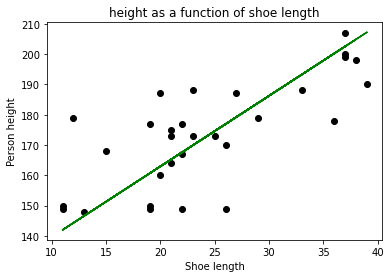

RMSE: 13.468833142938248


In [8]:
X_new = array(extra_data["shoe_length"])
y_new = array(extra_data["height"])

X_new = X_new.reshape(-1,1)
y_new = y_new.reshape(-1,1)

y_new_pred = model_loaded.predict(X_new)

# Show a graph of the result
# Don't worry about how this is done for now
%matplotlib inline
intercept = model.intercept_
slope = model.coef_
line = slope * X_new + intercept
graph.scatter(X_new, y_new,  color='black')
graph.plot(X_new, line, '-', c = 'green')
graph.ylabel('Person height')
graph.xlabel("Shoe length")
graph.title('height as a function of shoe length')
graph.show()

rms_new = mean_squared_error(y_new,y_new_pred, squared=False)
print(f"RMSE: {rms_new}")
